<a href="https://colab.research.google.com/github/flinkflora17/ML_kurzus/blob/main/alkalom4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cifar10 beimportálása

In [1]:
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


In [3]:
x_train[0].shape

(32, 32, 3)

In [4]:
class_names = ['repülő', 'autó', 'madár', 'macska', 'szarvas', 'kutya', 'béka', 'ló', 'hajó', 'kamion']

In [5]:
import matplotlib.pyplot as plt

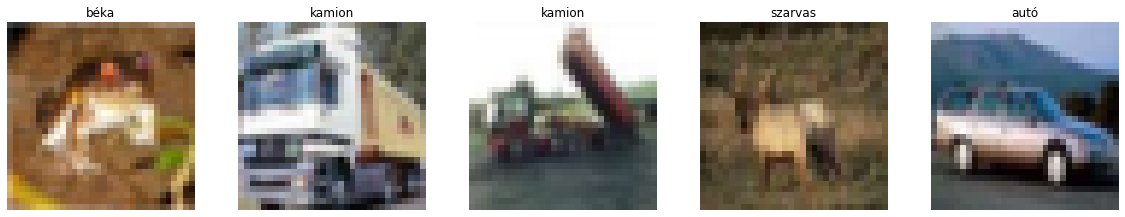

In [7]:
plt.figure(figsize = (20, 20))
for i in range(5):
  image = x_train[i]
  label = y_train[i]
  ax = plt.subplot(5, 5, i+1)
  plt.title(class_names[label[0]])
  plt.imshow(image)
  plt.axis('off')

## Adatok formálása

In [8]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [11]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train = to_categorical(y_train, num_classes = len(class_names))
y_test = to_categorical(y_test, num_classes = len(class_names))

# AlexNet

In [16]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [18]:
input = Input(shape = (32, 32, 3))
x = Conv2D(filters = 64, kernel_size = 5, strides = 4, activation = 'relu', padding = 'same')(input)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)
x = Conv2D(filters = 256, kernel_size = 5, activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)
x = Conv2D(filters = 384, kernel_size = 3, activation = 'relu', padding = 'same')(x)
x = Conv2D(filters = 384, kernel_size = 3, activation = 'relu', padding = 'same')(x)
x = Conv2D(filters = 192, kernel_size = 5, activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)
x = Flatten()(x)
x = Dense(4096, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(4096, activation = 'relu')(x)
x = Dropout(0.4)(x)
output = Dense(len(class_names), activation = 'softmax')(x)

In [19]:
AlexNet = keras.Model(input, output)

In [20]:
AlexNet.compile('adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [21]:
AlexNet.fit(x_train, y_train, epochs = 100, validation_split = 0.1)

Epoch 1/100
  12/1407 [..............................] - ETA: 20:15 - loss: 2.3037 - accuracy: 0.0911

KeyboardInterrupt: ignored